**Заказчик**

Интернет-магазин «Стримчик»

**Цель**

Проверка гипотиз:
- Как вы сформулировали нулевую и альтернативную гипотезы.
- Какой критерий применили для проверки гипотез и почему.

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Входные данные**

- Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

**Содержание**

- Этап 1. Откроем файлы, импортируем библиотеки
- Этап 2. Предобработка данных.
- Этап 3. Исследовательский анализ данных
- Этап 4. Портрет пользователя каждого региона
- Этап 5. Проверка гипотез
- Этап 6. Общий вывод

# Этап 1. Откроем файлы, импортируем библиотеки 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
game_data = pd.read_csv('/datasets/games.csv')
game_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns', None)
game_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Этап 2. Предобработка данных.

**Замена названия столбцов**

In [6]:
game_data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [7]:
game_data.columns = game_data.columns.str.lower()
game_data.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [8]:
game_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
game_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Видны странные моменты
User_Score - object 
Rating - object 
Year_of_Release - float64
Приведем к нормальному виду

**Обработайтка пропусков**

In [10]:
display(game_data['year_of_release'].isna().sum())    # кол-во пропусков в году

269

In [11]:
(game_data['year_of_release'].isna().sum()/ len(game_data['year_of_release']))*100    # доля 

1.609332934489979

In [12]:
game_data = game_data.dropna(subset=['year_of_release'])  
game_data['year_of_release'] = game_data['year_of_release'].astype('int')   

In [13]:
game_data['year_of_release'].unique()
np.sort(game_data['year_of_release'].unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [14]:
# Уберем значения, где не знаем название игры
game_data = game_data.loc[game_data['name'].notnull()]   

**Найдем дубликаты**

In [15]:
display(game_data.loc[game_data.duplicated(subset=['name', 'platform'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


На примере Most Wanted можно видеть, что еще нужно смотреть по году т.к. Most Wanted 2005 года != Most Wanted 2012

In [16]:
display(game_data.loc[game_data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [17]:
game_data = game_data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')  
display(game_data.loc[game_data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [18]:
game_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значение nan в рейтинге

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

EC — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

E — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

E10+ — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

T — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

AO — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

RP — Rating Pending Рейтинг ожидается.

In [19]:
game_data.loc[game_data['rating'] == 'K-A', 'rating'] = 'E'
game_data.loc[game_data['rating'] == 'EC', 'rating'] = 'E'

 K-A и EC меняем на E

In [20]:
game_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

**Расмотрим nan**

In [21]:
game_data.rating.isna().sum()

6676

У нас есть игры 80-х, а ESRB основана в 90-х -> отсутствие рейтинга нормально

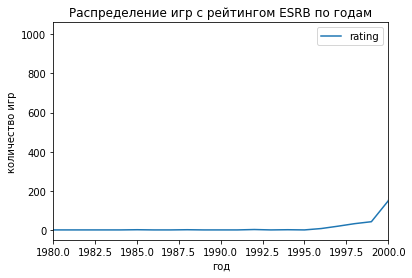

In [22]:
plots = game_data.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.xlim([1980, 2000])
plt.show()

Как видно у нас есть рейтинг с конца 90-х

In [23]:
game_data['rating'] = game_data['rating'].fillna('unrated')

- поставлена заглушка на пропуски в колонке рейтинга. Рейтинг ESRB это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.

In [24]:
game_data.rating.isna().sum()

0

Мы убрали nan в рейтинге

In [25]:
np.sort(game_data['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [26]:
game_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Значение tbd = to be determined. Можно заменить для дальнейшей работы**

In [27]:
game_data.user_score.replace('tbd', np.nan, inplace=True)
game_data['user_score'] = game_data['user_score'].astype('float')

In [28]:
np.sort(game_data['user_score'].unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

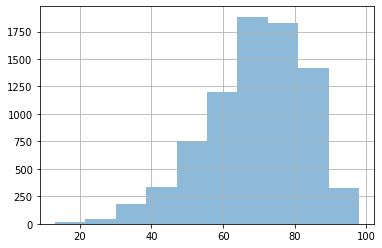

In [29]:
fig, ax = plt.subplots()
game_data.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5);

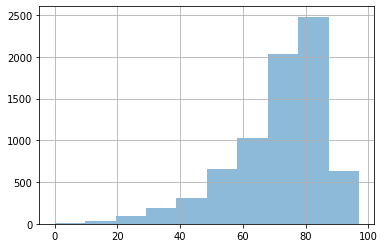

In [30]:
fig, ax = plt.subplots()
(game_data.user_score*10).hist(ax=ax, label='Оценка пользователей',alpha=0.5);

Как видим разное значение в районе 80-ти баллов

Оценки сопадают. Разброс оценок у пользователей шире

**Рассчет суммарных продаж во всех регионах и запись их в отдельный столбец.**

In [31]:
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']

In [32]:
game_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


In [33]:
game_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,0.536055
std,0.818400,0.506731,0.311109,0.188011,1.558828
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.540000


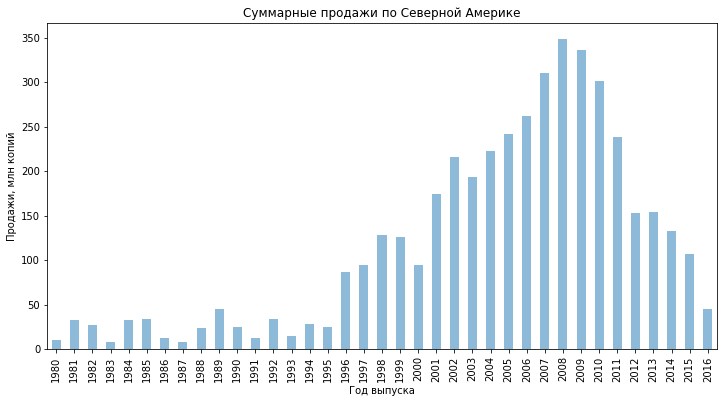

In [34]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')['na_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по Северной Америке')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

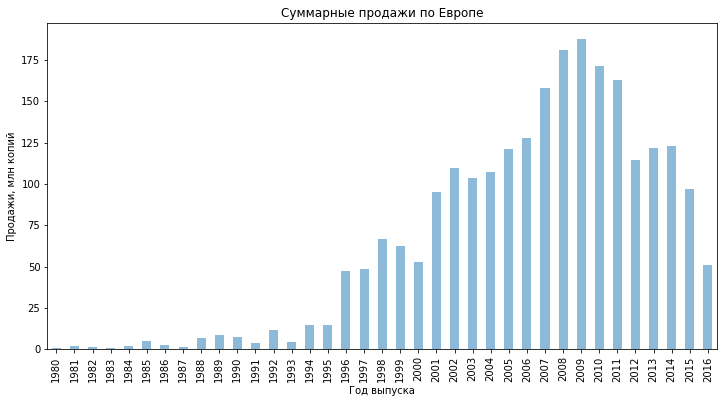

In [35]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')['eu_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по Европе')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

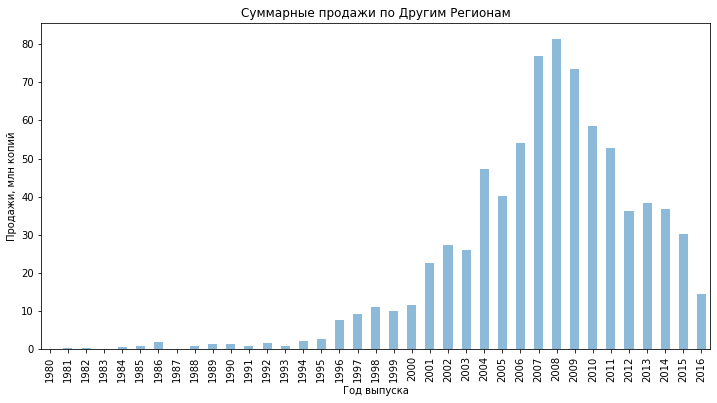

In [36]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')['other_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по Другим Регионам')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

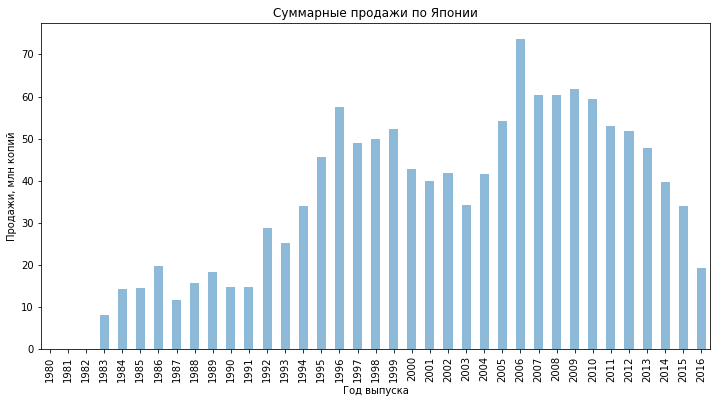

In [37]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')['jp_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по Японии')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

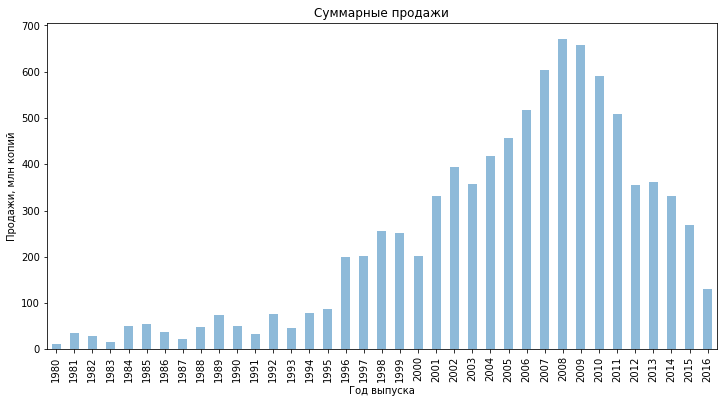

In [38]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')['total_sales']
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

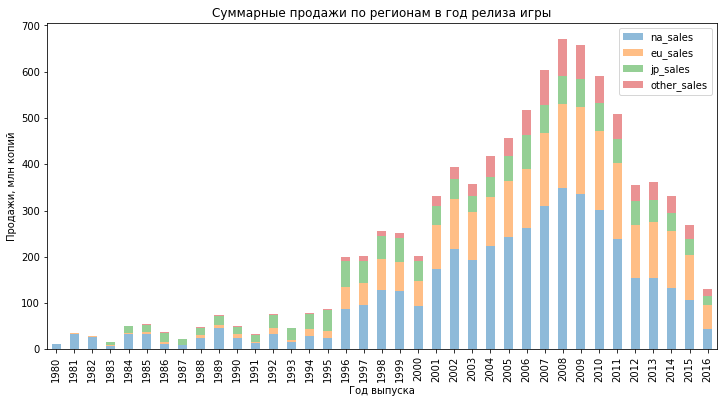

In [39]:
fig, ax = plt.subplots()

(game_data
 .groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в год релиза игры')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

Как видно видим до 1990 пики в 84-85 и особенно в 89 годах. После 92 и 94/95. Далее уже игровая индустрия стала шире.
Рынок в Северной Америке - самый большой, далее идет Европа. Рынок Японии в целом схож по продажам в других регионах.
Другие регионы стали получать свою долю рынка с 1996, но особенно сильно с 21 века

In [40]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = game_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Пропуски связаны с коментарием пользователей и критиков, так как игра только вышла или не успели прокоментировать можно исправить. Это напрямую свящано с tbd. Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению.

# Этап 3. Исследовательский анализ данных

**Сколько игр выпускалось в разные годы.**

In [41]:
games_data_years = game_data.pivot_table(index = 'platform', 
                                columns = 'year_of_release', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
games_data_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


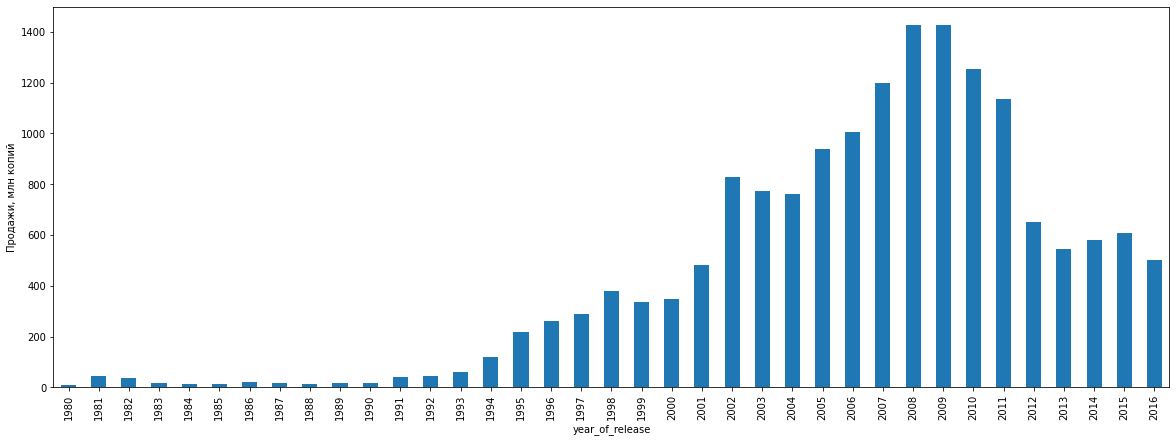

In [42]:
game_data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20, 7), ylabel='Продажи, млн копий');

- До 1994 года количество выпущенных игр было меньше 100, я думаю можно их не учитывать,  так как они являются статистической погрешностью. 
- Рост выпускаемых игр связано с развитием вычеслительных мощностей эвм. И резким развитием технологий в 90е.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

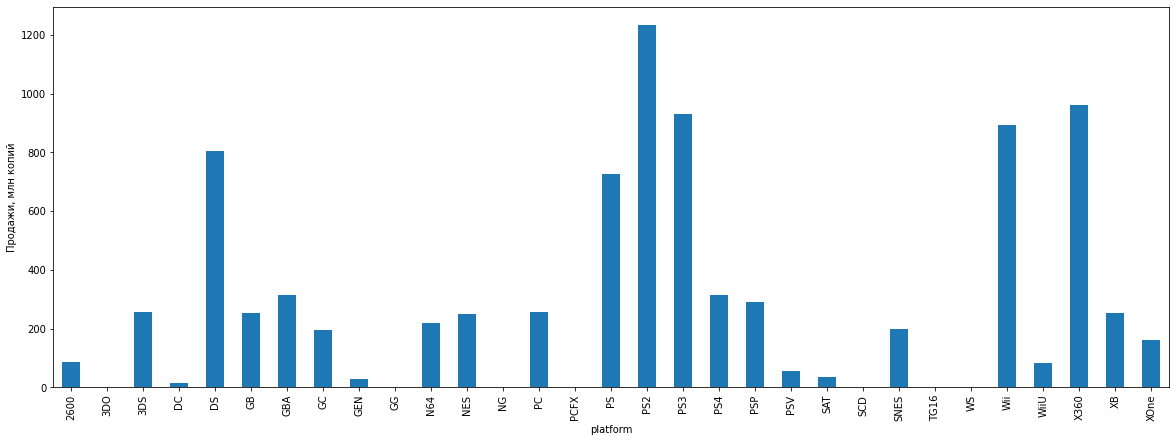

In [43]:
game_data.groupby('platform')['total_sales'].sum().plot(kind='bar', figsize=(20, 7), ylabel='Продажи, млн копий');

- Лидером продаж за все время является ps2, так как являлась приставко нового поколения которое стало очень популярна, а за ним идут ps3 как логическое продоление развития ps2, xbox конкурент ps, wii и ds, которое было популярно в Японии. 

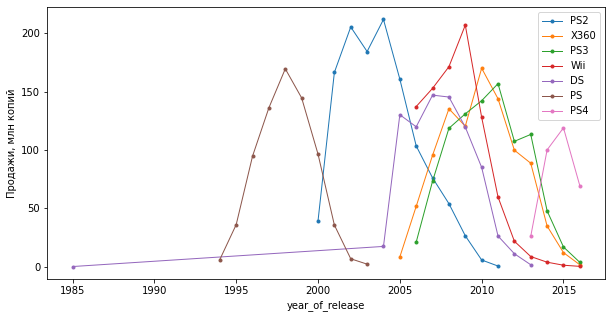

In [44]:
platform = ['PS2', 'X360','PS3','Wii', 'DS', 'PS', 'PS4']
for platform in platform:
    df_to_plot = game_data.query('platform == @platform')
    df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, figsize=(10,5),
                                                                    legend = platform, ylabel='Продажи, млн копий')

- надо сократить временную грацу для точного анализа.
- я думаю стоит брать временную границу с 2005 года, так как всплеск приставок произошел именно в этот год.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [45]:
games_2005 = game_data[game_data['year_of_release'] > 2004]

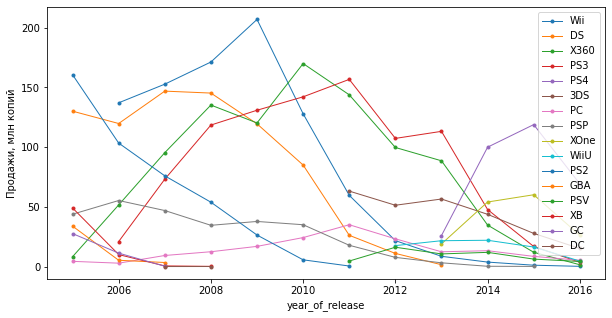

In [46]:
platform = games_2005['platform'].unique().tolist()
for platform in platform:
    df_to_plot = games_2005.query('platform == @platform')
    df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, figsize=(10,5), legend = platform, ylabel='Продажи, млн копий')

**2005 год все-же слишком далек от нас, сменилось много поколений консолей (то же PSP в 2016 является неактуальным). Сделаем выборку с 2013 года, там берут свой старт как минимум 4 точки (=консолей), возможно новое поколение консолей.**

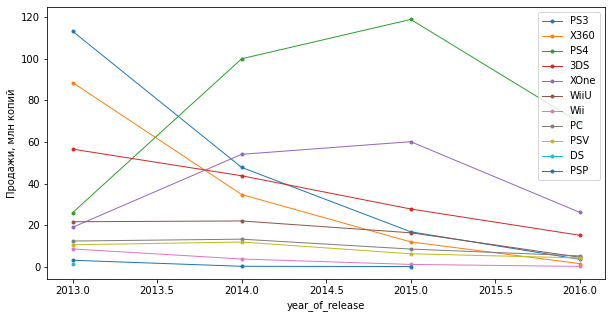

In [47]:
games_2013 = game_data[game_data['year_of_release'] >= 2013]
platform = games_2013['platform'].unique().tolist()
for platform in platform:
    df_to_plot = games_2013.query('platform == @platform')
    df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, figsize=(10,5), legend = platform, ylabel='Продажи, млн копий')

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

**Стоит обратить внимание на Sony PlayStation 4 и Xbox One от Microsoft. Далее идет 3DS, Wii U, Xbox 360 и PlayStation 3. Остальные платформы уже упали в продажах и не стоит их ждать в чартах за 2017 год
Так-же видна смена рынка на новые консоли, т.е. мало студий поддерживает старое поколение консолей с выходом нового, что очевидно**

**График «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

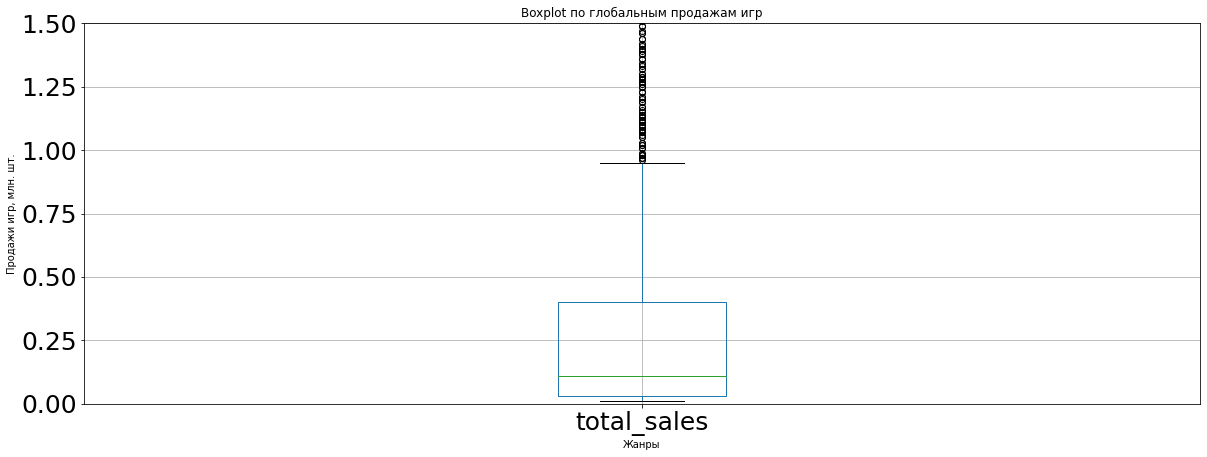

In [48]:
plt.figure(figsize=(20,7))

ax = games_2013.boxplot(column='total_sales', fontsize=25, figsize=(25,10),)
ax.set_ylim(0, 3)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_ylim([0,1.5])
ax.set_xlabel('Жанры')
ax.set_title('Boxplot по глобальным продажам игр')
plt.show()

- В среднем, продажи игр составляют до 0.9 млн долларов. Медиана - 0,1 миллиона долларов. Не сказать, что это много.

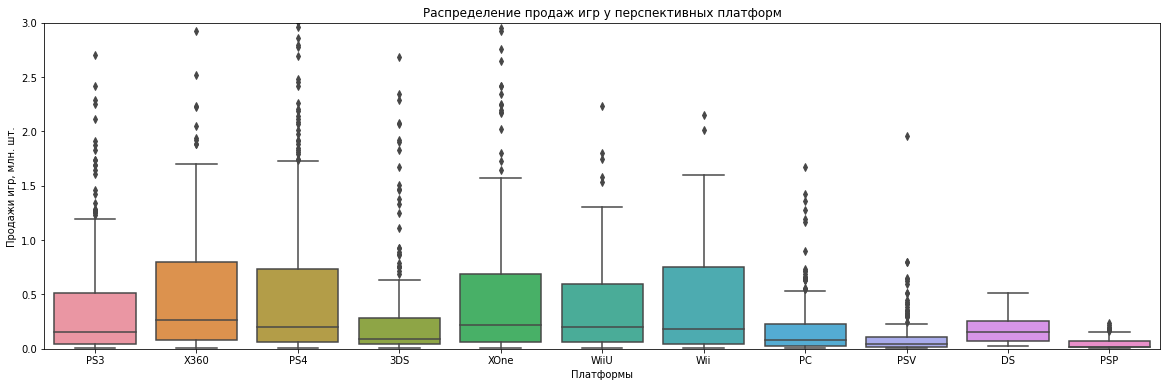

In [49]:
plt.figure(figsize=(20,6))

ax = sns.boxplot(x='platform', y='total_sales', data=games_2013)
ax.set_ylim(0, 3)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

- Как видно существуют тайтлы с действительно большими продажами, но все-же большая часть игрых смещена к нижниму краю. Можно увидеть, что игры на PSV переживают не лучшие времена по продажам

In [50]:
games_top_2013 = game_data.query('year_of_release >= 2013 & platform in ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]')
games_top_2013.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


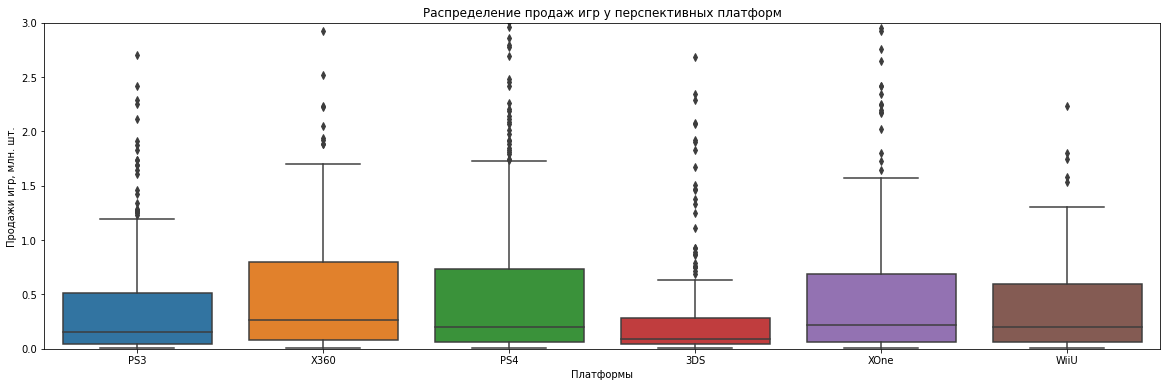

In [51]:

plt.figure(figsize=(20,6))

ax = sns.boxplot(x='platform', y='total_sales', data=games_top_2013)
ax.set_ylim(0, 3)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

- У топовых платформ дела обстоят лучше, первая 5ка уверено перешагивает средние продажи в в 0.5, а медиана примерно 0.3~0.4.

Для интерпретации диаграмм размаха 
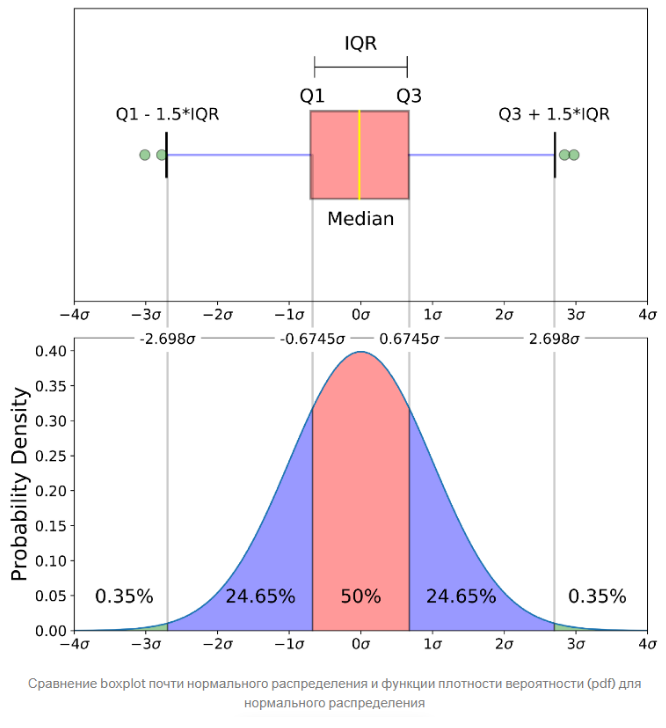

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Диаграмма рассеяния и  корреляцию между отзывами и продажами.**

In [52]:
games_top_2013.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(3)

,user_score,critic_score
platform,,
3DS,6.976,68.338
PS3,6.348,70.198
PS4,6.748,72.091
WiiU,7.017,71.643
X360,5.993,69.235
XOne,6.521,73.325


Подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для 6 платформ

In [53]:
games_top_2013.query('platform in ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]')['total_sales'].corr(games_top_2013.query('platform in ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]')['user_score'])

0.012941434221271702

Рассмотрим отдельно для каждой консоли

In [54]:
games_top_2013.query('platform == "PS4"')['total_sales'].corr(games_top_2013.query('platform == "PS4"')['user_score'])

-0.031957110204556376

In [55]:
games_top_2013.query('platform == "XOne"')['total_sales'].corr(games_top_2013.query('platform == "XOne"')['user_score'])

-0.06892505328279412

In [56]:
games_top_2013.query('platform == "3DS"')['total_sales'].corr(games_top_2013.query('platform == "3DS"')['user_score'])

0.24150411773563016

In [57]:
games_top_2013.query('platform == "PS3"')['total_sales'].corr(games_top_2013.query('platform == "PS3"')['user_score'])

0.0023944027357566925

In [58]:
games_top_2013.query('platform == "WiiU"')['total_sales'].corr(games_top_2013.query('platform == "WiiU"')['user_score'])

0.4193304819266187

In [59]:
games_top_2013.query('platform == "X360"')['total_sales'].corr(games_top_2013.query('platform == "X360"')['user_score'])

-0.011742185147181342

У западных консолей мало корреляции между продажами у пользовательским рейтингом, в отличии от их Японских коллег, где видна явная зависимость. Посмотрим то-же самое, только с критиками

In [60]:
games_top_2013.query('platform == "PS4"')['total_sales'].corr(games_top_2013.query('platform == "PS4"')['critic_score'])

0.406567902061781

In [61]:
games_top_2013.query('platform == "XOne"')['total_sales'].corr(games_top_2013.query('platform == "XOne"')['critic_score'])

0.41699832800840175

In [62]:
games_top_2013.query('platform == "3DS"')['total_sales'].corr(games_top_2013.query('platform == "3DS"')['critic_score'])

0.35705661422881035

In [63]:
games_top_2013.query('platform == "PS3"')['total_sales'].corr(games_top_2013.query('platform == "PS3"')['critic_score'])

0.3342853393371919

In [64]:
games_top_2013.query('platform == "WiiU"')['total_sales'].corr(games_top_2013.query('platform == "WiiU"')['critic_score'])

0.3764149065423912

In [65]:
games_top_2013.query('platform == "X360"')['total_sales'].corr(games_top_2013.query('platform == "X360"')['critic_score'])

0.3503445460228664

Тут уже видна явная зависимость между отзывам критиков и продажами. Интересно, что с новым поколением консолей (PS4/XOne) она проявляется сильнее чем со старым

Платформа PS4


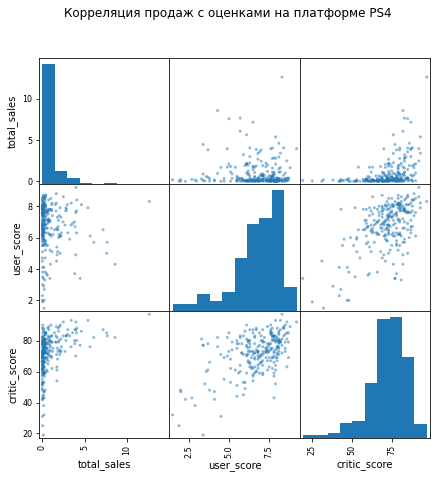

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Платформа XOne


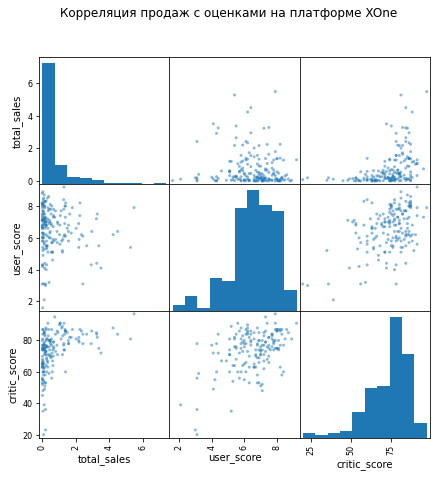

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


Платформа 3DS


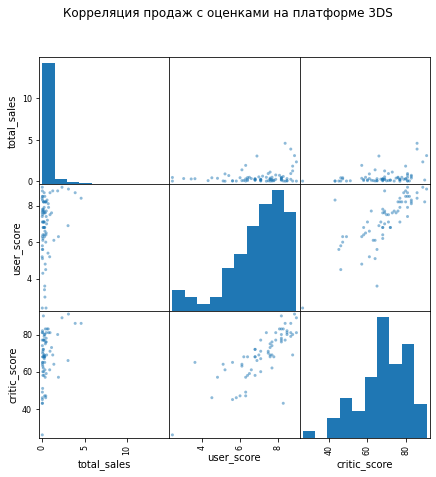

,total_sales,user_score,critic_score
total_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


Платформа PS3


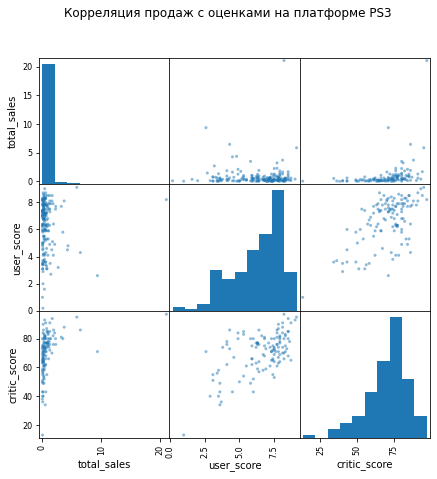

,total_sales,user_score,critic_score
total_sales,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


Платформа WiiU


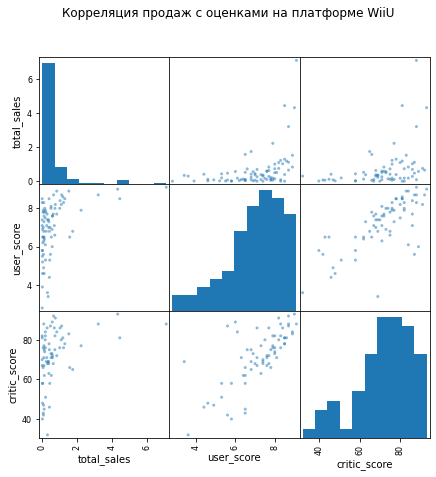

,total_sales,user_score,critic_score
total_sales,1.000000,0.419330,0.376415
user_score,0.419330,1.000000,0.721313
critic_score,0.376415,0.721313,1.000000


Платформа X360


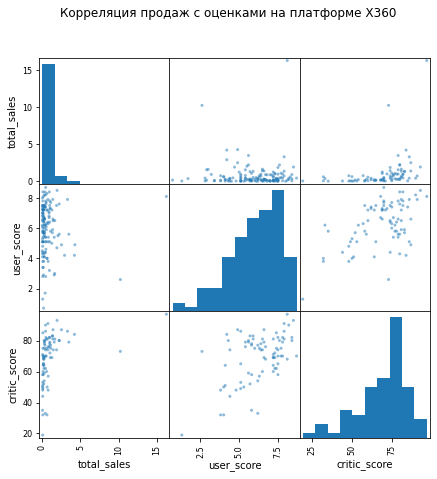

,total_sales,user_score,critic_score
total_sales,1.000000,-0.011742,0.350345
user_score,-0.011742,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


In [66]:
# рассчитаем коэффициенты корреляции и построим диграммы рассеяния другим способом

platform_list = ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]

for platform in platform_list:
    data = games_top_2013.query('platform == @platform')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (7,7))
    pd.plotting.scatter_matrix(data, ax=ax)
    print(f'Платформа {platform}')
    fig.suptitle(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()   
    
    display(games_top_2013.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))

**На WiiU отзывы пользователей коррелируют с продажами больше, чем отзывы критиков. В остальном они сильнее влияют на продажи, но тоже не сказать чтобы была сильная зависимость.**

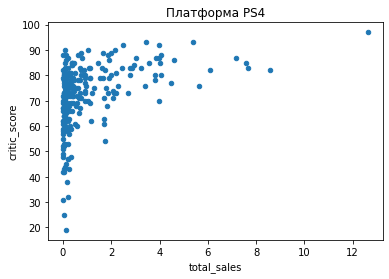

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


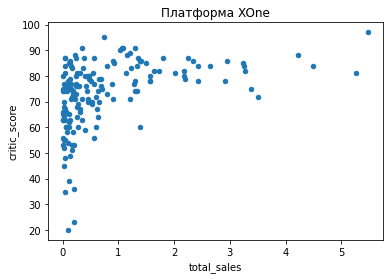

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


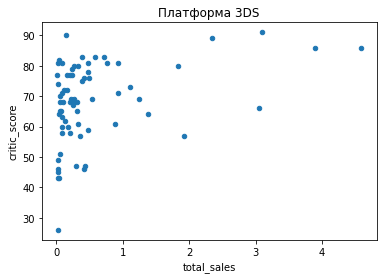

,total_sales,user_score,critic_score
total_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


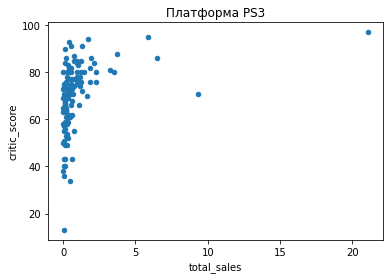

,total_sales,user_score,critic_score
total_sales,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


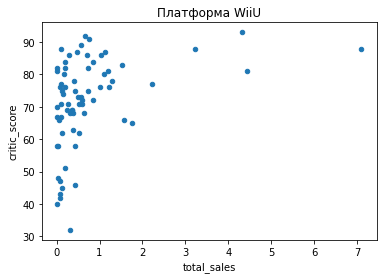

,total_sales,user_score,critic_score
total_sales,1.000000,0.419330,0.376415
user_score,0.419330,1.000000,0.721313
critic_score,0.376415,0.721313,1.000000


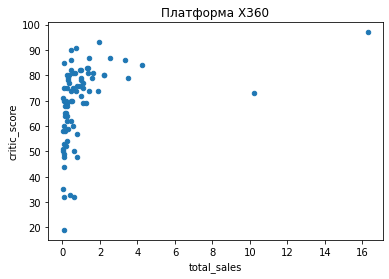

,total_sales,user_score,critic_score
total_sales,1.000000,-0.011742,0.350345
user_score,-0.011742,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


In [67]:
platform_list = ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]

for platform in platform_list:
    games_top_2013.query('platform == @platform').plot(x= 'total_sales',y= 'critic_score',kind='scatter', title=f'Платформа {platform}')
    plt.show()   
    
    display(games_top_2013.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))

за основу возьмем ps4, так как это современная платформа и оценки стабильные у нее.

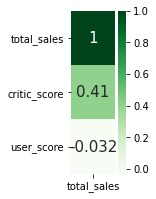

In [68]:
ps = games_top_2013[games_top_2013['platform'] == 'PS4']
ps = ps[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(ps.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15});

возьмем xbox как конкурента ps

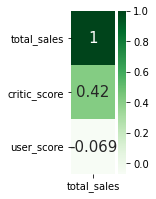

In [69]:
xbox = games_top_2013[games_top_2013['platform'] == 'XOne']
xbox = xbox[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(xbox.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15});

Похожая же корреляция, значит у нас получается правельный вывод.

**Вывод**
 Оценки критиков влияют сильнее, чем оценки пользователей. Но пользователи тоже важны, так как они тоже сильно влияют на цену.


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [70]:
games_top_2013['genre'].value_counts()

Action          569
Role-Playing    189
Sports          175
Shooter         153
Misc            116
Adventure       113
Fighting         67
Racing           66
Platform         62
Simulation       36
Strategy         27
Puzzle           15
Name: genre, dtype: int64

In [71]:
games_top_2013['genre'].count()

1588

In [72]:
games_top_2013['genre'].isna().sum()

0

In [73]:
games_top_2013.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,
All,143.25,181.43,314.14,64.63,136.80,159.32,999.57
Action,34.04,70.92,96.10,14.75,47.59,37.31,300.71
Shooter,0.06,31.79,88.56,5.48,35.48,60.33,221.70
Sports,1.82,32.35,55.61,2.46,25.96,26.74,144.94
Role-Playing,67.37,16.49,28.99,1.93,4.43,10.55,129.76
Misc,7.10,8.36,8.19,7.38,12.49,7.43,50.95
Platform,8.79,3.33,7.69,16.27,2.14,0.93,39.15
Racing,0.00,6.46,12.14,7.36,3.07,9.79,38.82
Fighting,8.21,6.05,8.65,6.09,2.55,2.45,34.00


In [74]:
games_top_2013.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


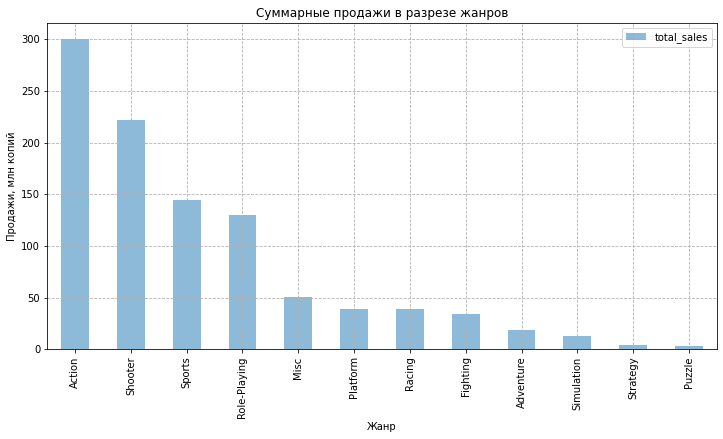

In [75]:
fig, ax = plt.subplots()

(games_top_2013
 .groupby('genre')[['total_sales']]
 .agg('sum').sort_values(['total_sales'],ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')

plt.show()

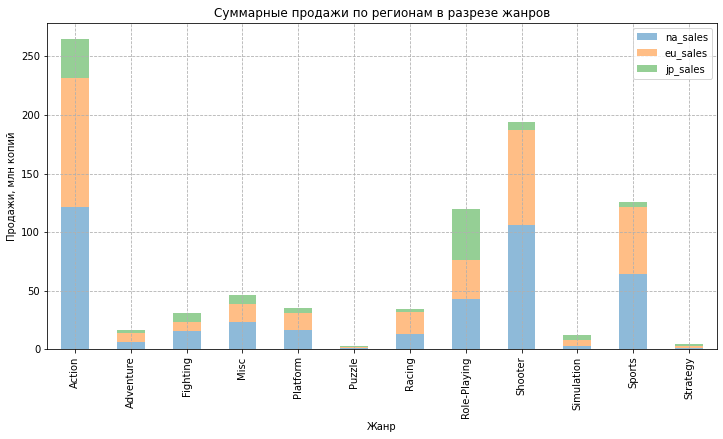

In [76]:
fig, ax = plt.subplots()

(games_top_2013
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')

plt.show()

**Самыми продаваемыми жанрами в играх являются Action, Shooter и Sports.**

**У PS4 видна сильная доля в Спорте, а у 3DS в RPG сегменте**

Посмотрим график для среднего количества продаж 

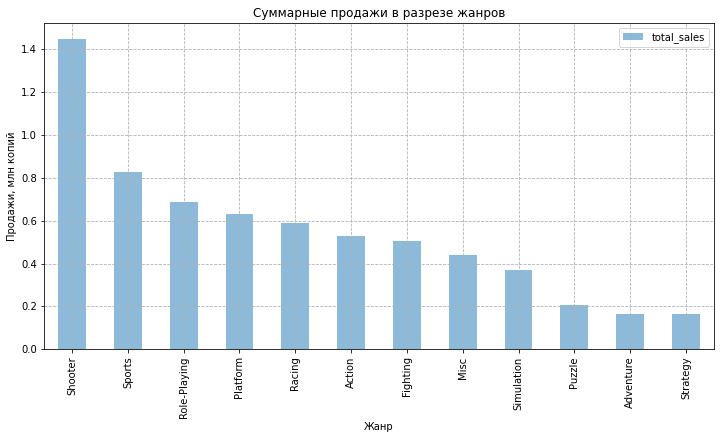

In [77]:
fig, ax = plt.subplots()

(games_top_2013
 .groupby('genre')[['total_sales']]
 .agg('mean').sort_values(['total_sales'],ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')

plt.show()

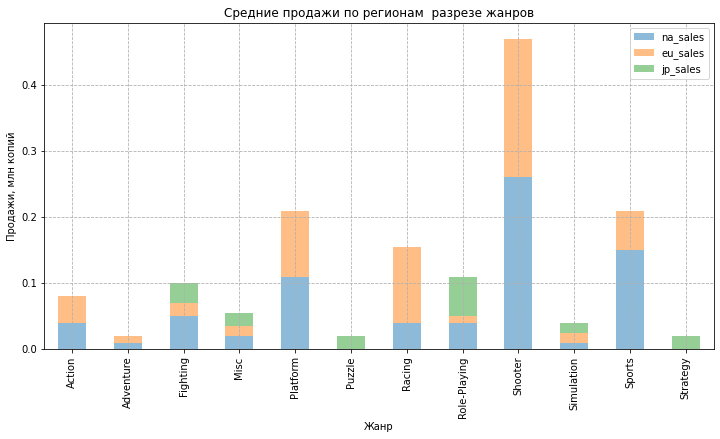

In [78]:
fig, ax = plt.subplots()

(games_top_2013
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('median')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Средние продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

**График изменился, Шутер является лидирущим жанром по продажам, на 2ом месте и на 3-м месте  с незначительной разницей стппртивные и platform, a Action ушел из первой тройки на 7 место. 
Еще интереснее выглядит жанр Platform, у которого не так много игр, но продажи хороши. Следовательно есть пару хитов с большими показателями продаж. А вот стратегии и паззлы переживают не лучшие времена**

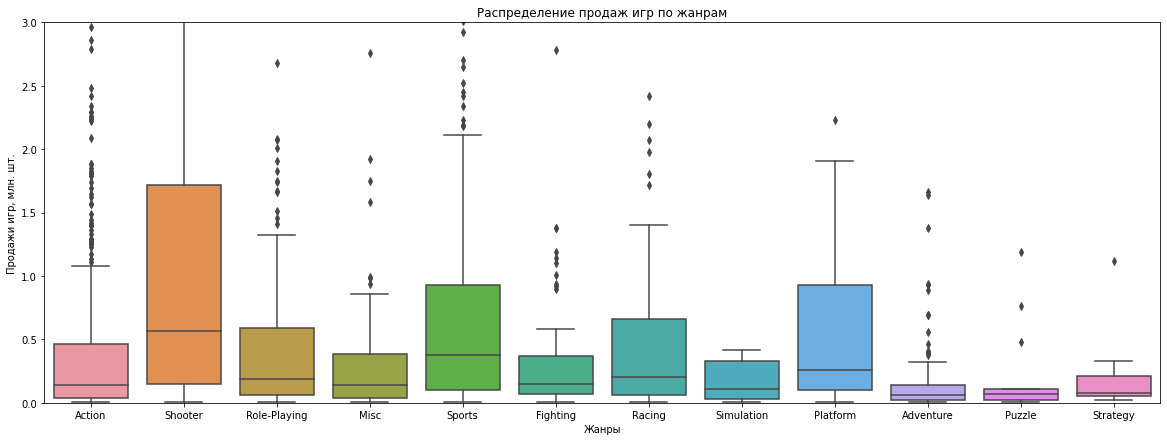

In [79]:
plt.figure(figsize=(20,7))

ax = sns.boxplot(x='genre', y='total_sales', data=games_top_2013)
ax.set_ylim(0, 3)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанры')
ax.set_title('Распределение продаж игр по жанрам')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>boxplot потвердил вывод, шутер продается лучше всех и в средняя, и медиана боьше чем у других
</div>

# Этап 4. Портрет пользователя каждого региона

**Самые популярные платформы (топ-5).**

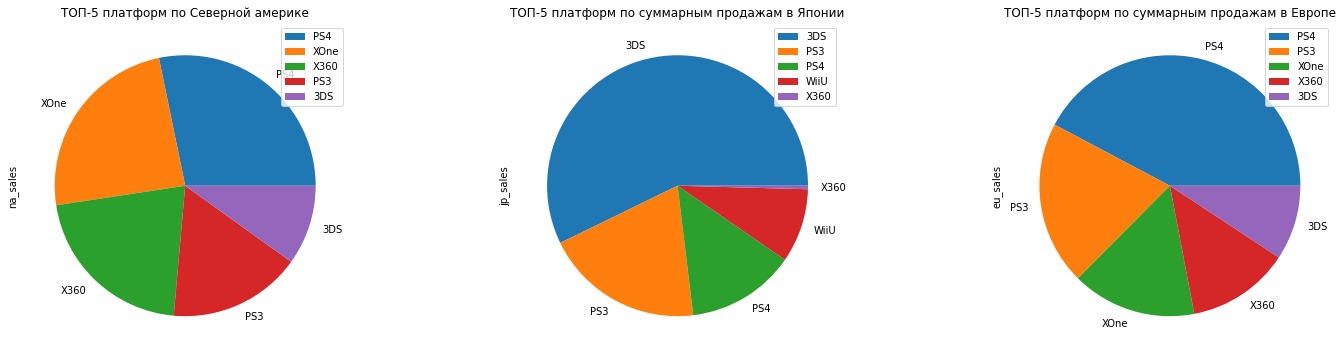

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
games_top_2013.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='pie',y ='na_sales', title='ТОП-5 платформ по Северной америке', ax=axes[0])

games_top_2013.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='pie',y = 'jp_sales',title='ТОП-5 платформ по суммарным продажам в Японии', ax=axes[1])

games_top_2013.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='pie',y = 'eu_sales',title='ТОП-5 платформ по суммарным продажам в Европе', ax=axes[2]);


**Самые популярные жанры (топ-5).**

In [81]:
games_top_2013.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.8%,57.1%,9.2%
PS3,19.2%,19.6%,15.3%
PS4,39.9%,13.4%,26.2%
WiiU,5.6%,9.2%,7.0%
X360,12.0%,0.4%,19.7%
XOne,14.6%,0.3%,22.5%


**Видно что разные предпочтения: в Японии доминирует 3DS и семейство Playstation, в Северной Америке Xbox и Playstation, в Европе в большей степени Playstation и затем Xbox**

In [82]:
games_top_2013.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]

,na_sales
genre,
Action,121.09
Shooter,105.97
Sports,64.66
Role-Playing,43.07
Misc,23.09


In [83]:
games_top_2013.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]

,jp_sales
genre,
Role-Playing,43.17
Action,33.78
Fighting,6.98
Misc,6.94
Shooter,6.56


In [84]:
games_top_2013.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]

,eu_sales
genre,
Action,110.28
Shooter,81.51
Sports,57.14
Role-Playing,33.17
Racing,19.31


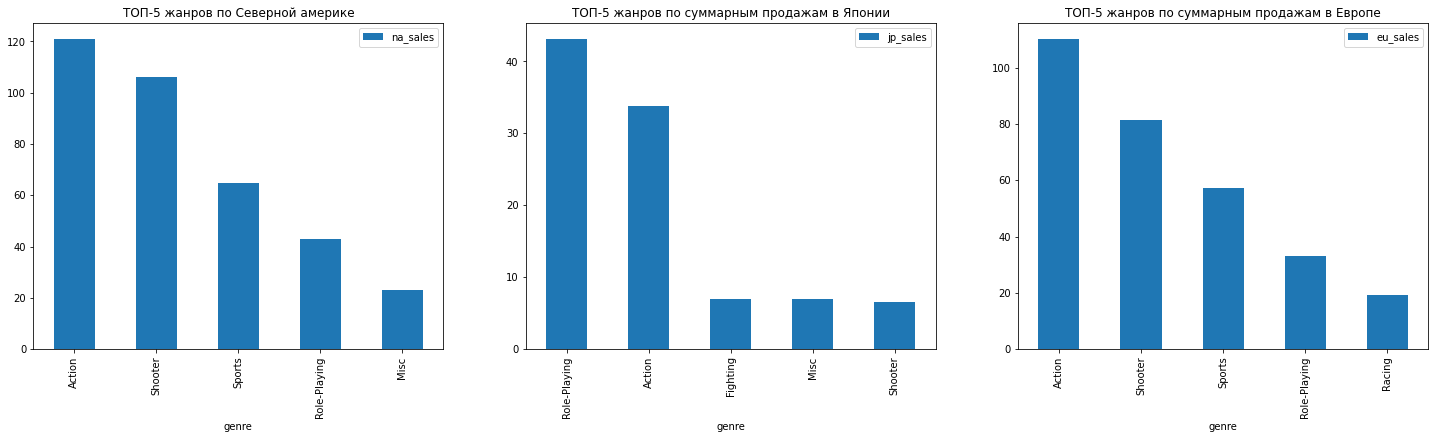

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
games_top_2013.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar', title='ТОП-5 жанров по Северной америке', ax=axes[0])

games_top_2013.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar', title='ТОП-5 жанров по суммарным продажам в Японии', ax=axes[1])

games_top_2013.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar', title='ТОП-5 жанров по суммарным продажам в Европе', ax=axes[2]);


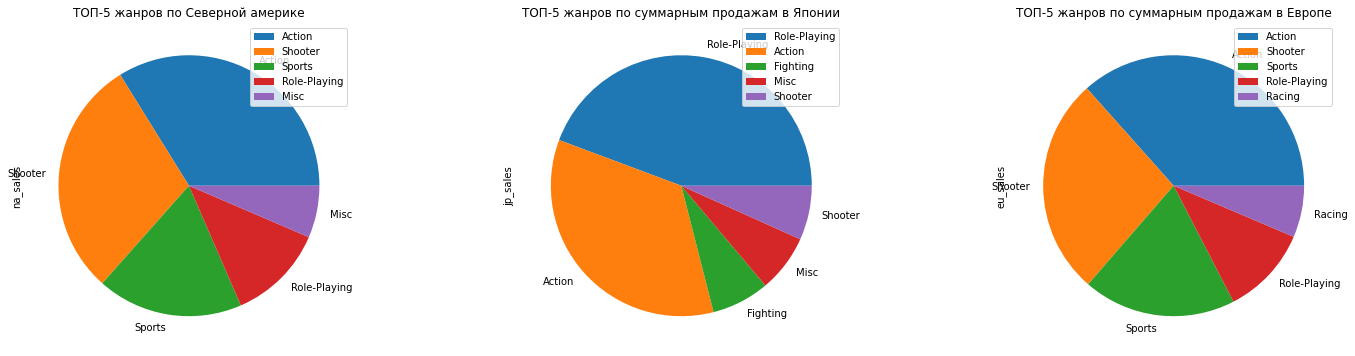

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
games_top_2013.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='pie',y ='na_sales', title='ТОП-5 жанров по Северной америке', ax=axes[0])

games_top_2013.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='pie',y = 'jp_sales',title='ТОП-5 жанров по суммарным продажам в Японии', ax=axes[1])

games_top_2013.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='pie',y = 'eu_sales',title='ТОП-5 жанров по суммарным продажам в Европе', ax=axes[2]);


**Влияние рейтинга ESRB на продажи в отдельном регионе**

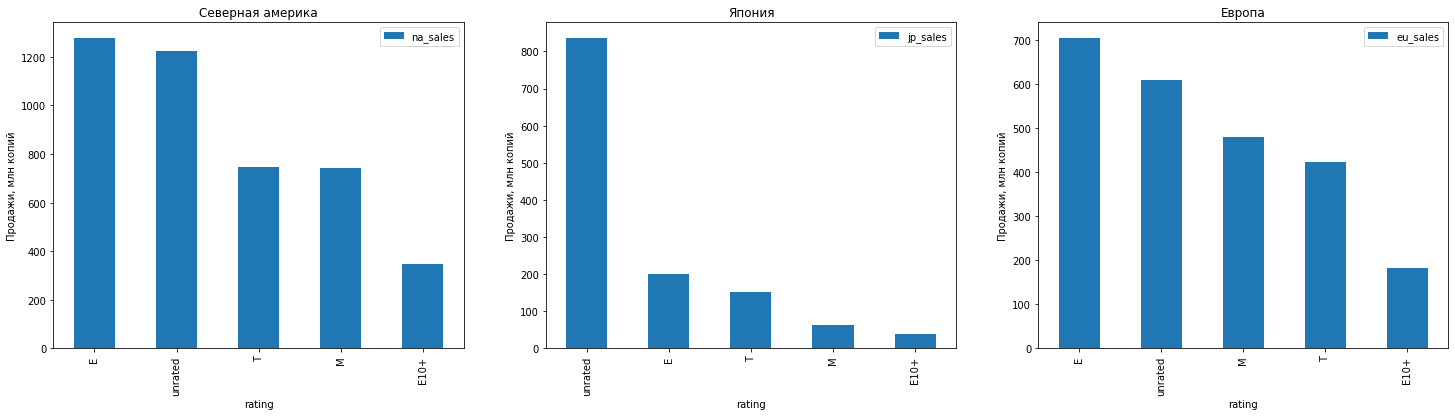

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
game_data.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar', title='Cеверная америка', ax=axes[0], ylabel='Продажи, млн копий')

game_data.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar', title='Япония', ax=axes[1], ylabel='Продажи, млн копий')

game_data.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar', title='Европа', ax=axes[2], ylabel='Продажи, млн копий');




In [88]:
games_top_2013.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,21.9%,12.6%,18.8%
E10+,9.8%,4.7%,11.3%
M,37.8%,10.7%,38.1%
T,9.9%,12.9%,10.9%
unrated,20.6%,59.1%,21.0%


**У Японии 59% игр без рейтинга - вероятно у них своя система оценок (к примеру японская CERO).**

**Некоторые жанры имеют ограничение по возрасту (Action/Shooter), а другие к примеру нет (многие из Sports/Puzzle)**

👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. 

# Этап 5. Проверка гипотез

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

In [89]:
display(games_2013.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))
xone = games_2013.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)
pc = games_2013.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

,user_score
platform,
PC,6.269677
XOne,6.521429


In [90]:
xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [91]:
pc.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

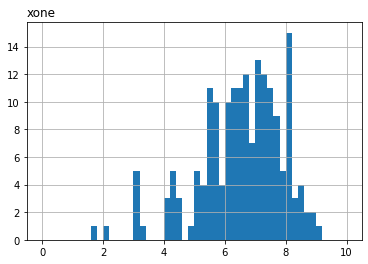

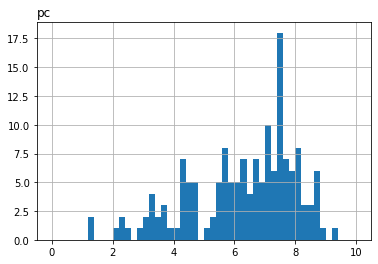

In [92]:
xone.hist(bins=50, range=(0,10))
plt.title('xone', loc='left')
plt.show()
    
    
pc.hist(bins=50, range=(0,10))
plt.title('pc', loc='left')
plt.show()

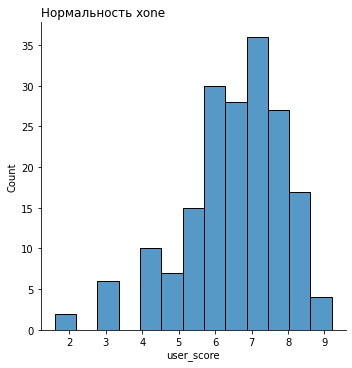

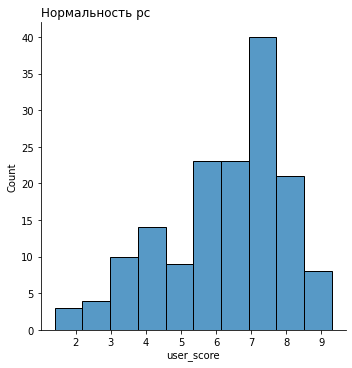

In [93]:
sns.displot(xone)
plt.title('Нормальность xone', loc='left')
plt.show()

sns.displot(pc)
plt.title('Нормальность pc', loc='left')
plt.show()

Оценок на ПК больше, игры на XOne разбросаны шире. 

Сделаем предположения:
H0, основная гипотеза - средние пользовательские рейтинги у PC и XONE одинаковые
H1, алтернативая основная гипотеза - средние пользовательские рейтинги у PC и XONE разные
Уровень значимости = 0.05
Посчитаем p-value, используя ttest из библиотеки scipy
Используем метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=False

Если p-value будет меньше выбранного уровня значимости, то нулевую гипотезу о равенстве средних отвергнем, в ином случае примем

In [94]:
from scipy.stats import ttest_ind

alpha = .05 

results = ttest_ind(xone, pc, equal_var=False)
print(results.pvalue)    

0.14759594013430463


0.14759594013430463 > 0.05

**Принимаем нулевую гипотезу, значит средние пользовательские рейтинги у PC и XONE похожие**

**Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

In [95]:
display(games_2013.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))
action = game_data.query('genre == "Action"').user_score.dropna().reset_index(drop=True)
sports = game_data.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

,user_score
genre,
Action,6.837532
Sports,5.238125


In [96]:
action.describe()

count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [97]:
sports.describe()

count    1080.000000
mean        6.952778
std         1.619732
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

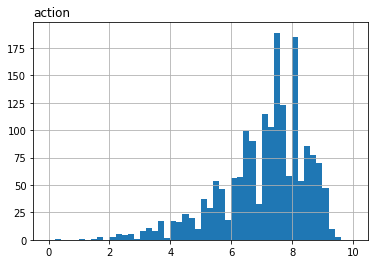

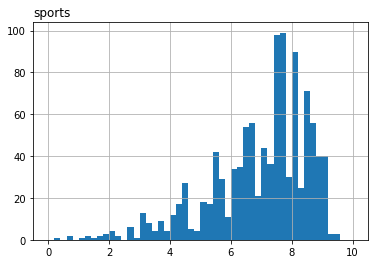

In [98]:
action.hist(bins=50, range=(0,10))
plt.title('action', loc='left')
plt.show()
    
    
sports.hist(bins=50, range=(0,10))
plt.title('sports', loc='left')
plt.show()

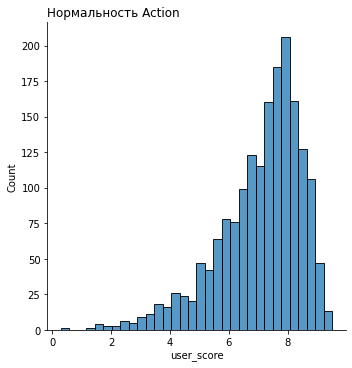

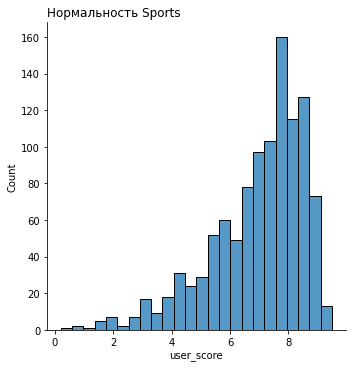

In [99]:
sns.displot(action)
plt.title('Нормальность Action', loc='left')
plt.show()

sns.displot(sports)
plt.title('Нормальность Sports', loc='left')
plt.show()

Распределения кажутся очень похожими

Сделаем предположения:
H0, основная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
H1, алтернативая основная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
Уровень значимости = 0.05
Посчитаем p-value, используя ttest из библиотеки scipy
Используем метод st.stats.ttest_ind, так же мы будем использовать параметр equal_var=True т.к. выборки похожи

Если p-value будет меньше выбранного уровня значимости, то нулевую гипотезу о равенстве средних отвергнем, в ином случае примем

In [100]:
results = ttest_ind(action, sports, equal_var=True)
print(results.pvalue)    

0.06833686503882228


0.06 > 0.05

**Принимаем нулевую гипотезу о равенстве средних пользовательских оценок Action и Sports**

# Этап 6. Общий вывод

Мы сделали следующие выводы:

Самыми перспективными консолями являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ Nintendo 3DS, но уже идет спад; В Европе будет популярна PS, в Северной Америке XBOX, а на Японском рынке 3DS.

Оценки пользователей на продажи слабо влияют, а вот оценки критиков имеют корреляцию, однако довольно среднюю

Из жанров мы рекомендуем выбрать игры в стиле Shoters и Sports, platform однако для японцев предпочтителен жанр РПГ. Так-же у них отличается система от европейской и американской по системе рейтинга игр (детский/взрослый)

Средние пользовательские рейтинги Xbox One и PC похожи (схожие средние значения статистически);

Средние пользовательские оценки в жанрах Action и Sports совпадают

В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.